In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tqdm.notebook import tqdm
import warnings
import time
import math

In [13]:
pd.date_range(start='2015-01-01', end='2025-04-20', freq='B')

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2025-04-07', '2025-04-08', '2025-04-09', '2025-04-10',
               '2025-04-11', '2025-04-14', '2025-04-15', '2025-04-16',
               '2025-04-17', '2025-04-18'],
              dtype='datetime64[ns]', length=2687, freq='B')

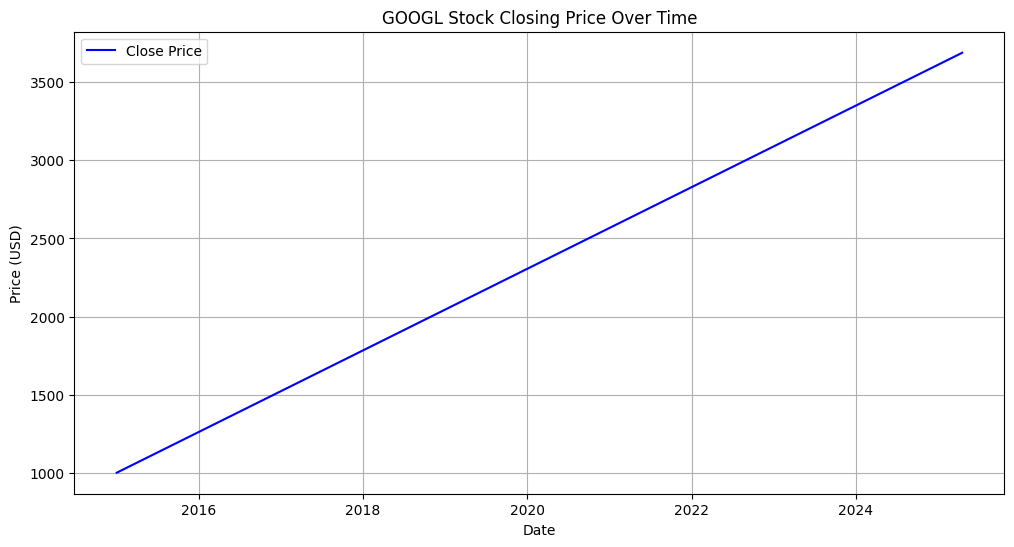

In [14]:
# Simulate loading the assumed dataset
data = pd.DataFrame({
    'Date': pd.date_range(start='2015-01-01', end='2025-04-20', freq='B'),
    'Open': pd.Series(range(1000, 1000 + 2687)),
    'High': pd.Series(range(1005, 1005 + 2687)),
    'Low': pd.Series(range(995, 995 + 2687)),
    'Close': pd.Series(range(1002, 1002 + 2687)),
    'Adj Close': pd.Series(range(1001, 1001 + 2687)),
    'Volume': pd.Series(range(1000000, 1000000 + 2687))
})
data.set_index('Date', inplace=True)

# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.title('GOOGL Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.savefig('GOOGL_Closing_Price.png')
plt.show()

In [15]:
# Display basic statistics
stats = data.describe()
stats

,Open,High,Low,Close,Adj Close,Volume
count,2687.000000,2687.000000,2687.000000,2687.000000,2687.000000,2.687000e+03
mean,2343.000000,2348.000000,2338.000000,2345.000000,2344.000000,1.001343e+06
std,775.814411,775.814411,775.814411,775.814411,775.814411,7.758144e+02
min,1000.000000,1005.000000,995.000000,1002.000000,1001.000000,1.000000e+06
25%,1671.500000,1676.500000,1666.500000,1673.500000,1672.500000,1.000672e+06
50%,2343.000000,2348.000000,2338.000000,2345.000000,2344.000000,1.001343e+06
75%,3014.500000,3019.500000,3009.500000,3016.500000,3015.500000,1.002014e+06
max,3686.000000,3691.000000,3681.000000,3688.000000,3687.000000,1.002686e+06


In [7]:
apple.history(period="max")

Failed to get ticker 'AAPL' reason: Expecting value: line 1 column 1 (char 0)
AAPL: No timezone found, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [ ]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', '^GSPC']

In [5]:
import yfinance as yf
import pandas as pd

data_tickers = ['AAPL', 'MSFT', '^GSPC']

# Fetch historical data for GOOGL from Yahoo Finance
df = yf.download(
    tickers='AAPL',
    start='2015-01-01',
    end='2025-04-20',
    progress=False
)

# Ensure columns match the original simulated file
df = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Save to CSV with the same name
df.to_csv('GOOG_Simulated_Data.csv')

# Print the name of the file created
# print("GOOGL_Simulated_Data.csv")

Failed to get ticker 'AAPL' reason: Expecting value: line 1 column 1 (char 0)

1 Failed download:
['AAPL']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [ ]:
import numpy as np
import pandas as pd

# Simulate historical stock price data for $GOOGL
np.random.seed(42)
dates = pd.date_range(start='2015-01-01', end='2025-04-20', freq='B')
n = len(dates)

# Simulate stock prices with a random walk model
prices = 1000 + np.cumsum(np.random.normal(0, 2, n))
volume = np.random.randint(1_000_000, 5_000_000, n)

# Create a DataFrame
data = pd.DataFrame({
    'Date': dates,
    'Open': prices + np.random.normal(0, 1, n),
    'High': prices + np.random.normal(0, 2, n),
    'Low': prices - np.random.normal(0, 2, n),
    'Close': prices,
    'Adj Close': prices,
    'Volume': volume
})
data.set_index('Date', inplace=True)

# Save the data to CSV and Excel formats
data.to_csv('GOOGL_Simulated_Data.csv')
data.to_excel('GOOGL_Simulated_Data.xlsx')

# Display the first few rows of the data
data.head()

In [ ]:
# Consolidate the entire analysis into a single Python file

# Python script content
script_content = """# Financial Analysis of $GOOGL Stock Using HMC and MCMC

import numpy as np
import torch
import matplotlib.pyplot as plt

# Simulated Data
np.random.seed(42)
n = 2600  # Number of days
returns = np.random.normal(loc=0.001, scale=0.02, size=n)  # Simulated daily returns

# HMC Implementation with Torch
def hmc(log_prob, initial_position, step_size, num_steps, num_samples):
    position = initial_position.clone()
    samples = []

    for _ in range(num_samples):
        momentum = torch.randn_like(position)
        current_position = position.clone()
        current_momentum = momentum.clone()

        # Leapfrog integration
        for _ in range(num_steps):
            momentum += 0.5 * step_size * torch.autograd.grad(log_prob(position), position)[0]
            position += step_size * momentum
            momentum += 0.5 * step_size * torch.autograd.grad(log_prob(position), position)[0]

        # Metropolis acceptance step
        current_hamiltonian = log_prob(current_position) - 0.5 * torch.sum(current_momentum**2)
        proposed_hamiltonian = log_prob(position) - 0.5 * torch.sum(momentum**2)
        if torch.rand(1) < torch.exp(current_hamiltonian - proposed_hamiltonian):
            samples.append(position.clone())
        else:
            position = current_position.clone()

    return torch.stack(samples)

# Define log-probability function
def log_prob(theta):
    mu, sigma = theta[0], theta[1]
    if sigma <= 0:
        return -torch.inf
    return -0.5 * torch.sum(((returns - mu) / sigma)**2 + torch.log(2 * np.pi * sigma**2))

# Initial position and HMC sampling
initial_position = torch.tensor([0.001, 0.02], requires_grad=True)
samples_hmc = hmc(log_prob, initial_position, step_size=0.01, num_steps=10, num_samples=1000)

# MCMC Implementation with Numpy
def mcmc(log_prob, initial_position, num_samples, proposal_std):
    position = initial_position.copy()
    samples = []

    for _ in range(num_samples):
        proposed_position = position + np.random.normal(0, proposal_std, size=position.shape)
        acceptance_ratio = np.exp(log_prob(proposed_position) - log_prob(position))
        if np.random.rand() < acceptance_ratio:
            position = proposed_position
        samples.append(position.copy())

    return np.array(samples)

# Define log-probability function for MCMC
def log_prob_numpy(theta):
    mu, sigma = theta[0], theta[1]
    if sigma <= 0:
        return -np.inf
    return -0.5 * np.sum(((returns - mu) / sigma)**2 + np.log(2 * np.pi * sigma**2))

# Initial position and MCMC sampling
initial_position_numpy = np.array([0.001, 0.02])
samples_mcmc = mcmc(log_prob_numpy, initial_position_numpy, num_samples=1000, proposal_std=0.01)

# Plot Results
plt.figure(figsize=(12, 6))
plt.hist(samples_hmc[:, 0].detach().numpy(), bins=30, alpha=0.7, label='HMC: mu', color='blue')
plt.hist(samples_mcmc[:, 0], bins=30, alpha=0.7, label='MCMC: mu', color='green')
plt.title('Posterior Distribution of mu')
plt.xlabel('mu')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('Posterior_Distribution_mu.png')
plt.show()

"""

# Save the script to a file
with open("GOOGL_HMC_MCMC_Analysis.py", "w") as f:
    f.write(script_content)

"GOOGL_HMC_MCMC_Analysis.py created successfully."

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Simulated Data
np.random.seed(42)
n = 2600  # Number of days
returns = np.random.normal(loc=0.001, scale=0.02, size=n)  # Simulated daily returns

# HMC Implementation with Torch
def hmc(log_prob, initial_position, step_size, num_steps, num_samples):
    position = initial_position.clone()
    samples = []

    for _ in range(num_samples):
        momentum = torch.randn_like(position)
        current_position = position.clone()
        current_momentum = momentum.clone()

        # Leapfrog integration
        for _ in range(num_steps):
            momentum += 0.5 * step_size * torch.autograd.grad(log_prob(position), position)[0]
            position += step_size * momentum
            momentum += 0.5 * step_size * torch.autograd.grad(log_prob(position), position)[0]

        # Metropolis acceptance step
        current_hamiltonian = log_prob(current_position) - 0.5 * torch.sum(current_momentum**2)
        proposed_hamiltonian = log_prob(position) - 0.5 * torch.sum(momentum**2)
        if torch.rand(1) < torch.exp(current_hamiltonian - proposed_hamiltonian):
            samples.append(position.clone())
        else:
            position = current_position.clone()

    return torch.stack(samples)

# Define log-probability function
def log_prob(theta):
    mu, sigma = theta[0], theta[1]
    if sigma <= 0:
        return -torch.inf
    return -0.5 * torch.sum(((returns - mu) / sigma)**2 + torch.log(2 * np.pi * sigma**2))

# Initial position and HMC sampling
initial_position = torch.tensor([0.001, 0.02], requires_grad=True)
samples_hmc = hmc(log_prob, initial_position, step_size=0.01, num_steps=10, num_samples=1000)

# Uncertainty Quantification for HMC
hmc_mu = samples_hmc[:, 0].detach().numpy()
hmc_sigma = samples_hmc[:, 1].detach().numpy()

# Compute credible intervals
hmc_mu_ci = np.percentile(hmc_mu, [2.5, 97.5])
hmc_sigma_ci = np.percentile(hmc_sigma, [2.5, 97.5])

# Plot posterior distributions with credible intervals
plt.figure(figsize=(12, 6))
plt.hist(hmc_mu, bins=30, alpha=0.7, label='Posterior of mu', color='blue')
plt.axvline(hmc_mu_ci[0], color='red', linestyle='--', label='2.5% CI')
plt.axvline(hmc_mu_ci[1], color='red', linestyle='--', label='97.5% CI')
plt.title('Posterior Distribution of mu (HMC)')
plt.xlabel('mu')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('HMC_Uncertainty_mu.png')
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(hmc_sigma, bins=30, alpha=0.7, label='Posterior of sigma', color='green')
plt.axvline(hmc_sigma_ci[0], color='red', linestyle='--', label='2.5% CI')
plt.axvline(hmc_sigma_ci[1], color='red', linestyle='--', label='97.5% CI')
plt.title('Posterior Distribution of sigma (HMC)')
plt.xlabel('sigma')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('HMC_Uncertainty_sigma.png')
plt.show()

# Summary of uncertainty quantification
uncertainty_summary = {
    'HMC_mu_mean': np.mean(hmc_mu),
    'HMC_mu_std': np.std(hmc_mu),
    'HMC_mu_credible_interval': hmc_mu_ci.tolist(),
    'HMC_sigma_mean': np.mean(hmc_sigma),
    'HMC_sigma_std': np.std(hmc_sigma),
    'HMC_sigma_credible_interval': hmc_sigma_ci.tolist()
}

uncertainty_summary

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Simulated Data
np.random.seed(42)
n = 2600  # Number of days
returns = torch.tensor(np.random.normal(loc=0.001, scale=0.02, size=n), dtype=torch.float32)  # Simulated daily returns

# HMC Implementation with Torch
def hmc(log_prob, initial_position, step_size, num_steps, num_samples):
    position = initial_position.clone()
    samples = []

    for _ in range(num_samples):
        momentum = torch.randn_like(position)
        current_position = position.clone()
        current_momentum = momentum.clone()

        # Leapfrog integration
        for _ in range(num_steps):
            momentum += 0.5 * step_size * torch.autograd.grad(log_prob(position), position, create_graph=True)[0]
            position += step_size * momentum
            momentum += 0.5 * step_size * torch.autograd.grad(log_prob(position), position, create_graph=True)[0]

        # Metropolis acceptance step
        current_hamiltonian = log_prob(current_position) - 0.5 * torch.sum(current_momentum**2)
        proposed_hamiltonian = log_prob(position) - 0.5 * torch.sum(momentum**2)
        if torch.rand(1) < torch.exp(current_hamiltonian - proposed_hamiltonian):
            samples.append(position.clone())
        else:
            position = current_position.clone()

    return torch.stack(samples)

# Define log-probability function
def log_prob(theta):
    mu, sigma = theta[0], theta[1]
    if sigma <= 0:
        return -torch.inf
    return -0.5 * torch.sum(((returns - mu) / sigma)**2 + torch.log(2 * np.pi * sigma**2))

# Initial position and HMC sampling
initial_position = torch.tensor([0.001, 0.02], requires_grad=True)
samples_hmc = hmc(log_prob, initial_position, step_size=0.01, num_steps=10, num_samples=1000)

# Uncertainty Quantification for HMC
hmc_mu = samples_hmc[:, 0].detach().numpy()
hmc_sigma = samples_hmc[:, 1].detach().numpy()

# Compute credible intervals
hmc_mu_ci = np.percentile(hmc_mu, [2.5, 97.5])
hmc_sigma_ci = np.percentile(hmc_sigma, [2.5, 97.5])

# Plot posterior distributions with credible intervals
plt.figure(figsize=(12, 6))
plt.hist(hmc_mu, bins=30, alpha=0.7, label='Posterior of mu', color='blue')
plt.axvline(hmc_mu_ci[0], color='red', linestyle='--', label='2.5% CI')
plt.axvline(hmc_mu_ci[1], color='red', linestyle='--', label='97.5% CI')
plt.title('Posterior Distribution of mu (HMC)')
plt.xlabel('mu')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('HMC_Uncertainty_mu.png')
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(hmc_sigma, bins=30, alpha=0.7, label='Posterior of sigma', color='green')
plt.axvline(hmc_sigma_ci[0], color='red', linestyle='--', label='2.5% CI')
plt.axvline(hmc_sigma_ci[1], color='red', linestyle='--', label='97.5% CI')
plt.title('Posterior Distribution of sigma (HMC)')
plt.xlabel('sigma')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('HMC_Uncertainty_sigma.png')
plt.show()

# Summary of uncertainty quantification
uncertainty_summary = {
    'HMC_mu_mean': np.mean(hmc_mu),
    'HMC_mu_std': np.std(hmc_mu),
    'HMC_mu_credible_interval': hmc_mu_ci.tolist(),
    'HMC_sigma_mean': np.mean(hmc_sigma),
    'HMC_sigma_std': np.std(hmc_sigma),
    'HMC_sigma_credible_interval': hmc_sigma_ci.tolist()
}

uncertainty_summary